##  Keras Syntax Basic

Memprediksi batu permata bedasarkan featurnya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## EDA

In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


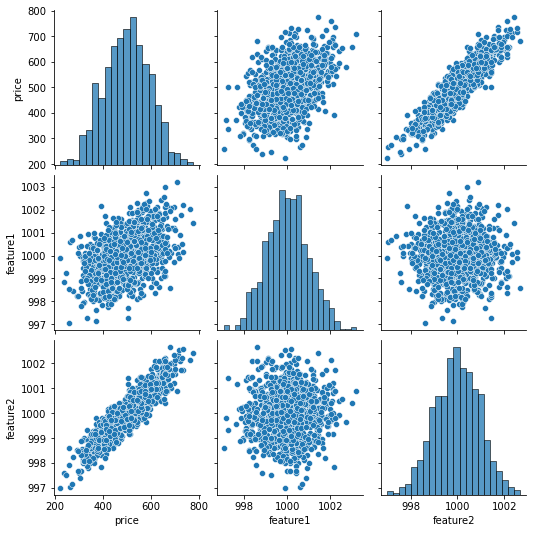

In [7]:
sns.pairplot(df);

----------
## Train Test Split

In [8]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.30, random_state = 42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
y_train.shape

(700,)

In [14]:
y_test.shape

(300,)

------

## Scaler data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

------------
## Create Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(4, activation ='relu')) # input layers
model.add(Dense(4, activation ='relu')) # hidden layers
model.add(Dense(4, activation ='relu')) # hidden layers

model.add(Dense(1)) # output layers

# model compile
model.compile(loss='mse', optimizer= 'rmsprop')

## Fitting Model

In [20]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 4s 6ms/step - loss: 256315.0469
Epoch 2/250
22/22 [==============================] - 0s 6ms/step - loss: 256120.3594
Epoch 3/250
22/22 [==============================] - 0s 6ms/step - loss: 255921.7656
Epoch 4/250
22/22 [==============================] - 0s 6ms/step - loss: 255697.8750
Epoch 5/250
22/22 [==============================] - 0s 6ms/step - loss: 255445.6250
Epoch 6/250
22/22 [==============================] - 0s 6ms/step - loss: 255163.0625
Epoch 7/250
22/22 [==============================] - 0s 7ms/step - loss: 254847.7188
Epoch 8/250
22/22 [==============================] - 0s 7ms/step - loss: 254495.7500
Epoch 9/250
22/22 [==============================] - 0s 6ms/step - loss: 254101.4688
Epoch 10/250
22/22 [==============================] - 0s 6ms/step - loss: 253665.0469
Epoch 11/250
22/22 [==============================] - 0s 6ms/step - loss: 253181.4219
Epoch 12/250
22/22 [==============================] - 0s 7ms/st

22/22 [==============================] - 0s 7ms/step - loss: 24.6364
Epoch 195/250
22/22 [==============================] - 0s 6ms/step - loss: 24.2049
Epoch 196/250
22/22 [==============================] - 0s 6ms/step - loss: 24.5103
Epoch 197/250
22/22 [==============================] - 0s 6ms/step - loss: 24.3825
Epoch 198/250
22/22 [==============================] - 0s 6ms/step - loss: 24.4750
Epoch 199/250
22/22 [==============================] - 0s 6ms/step - loss: 24.5256
Epoch 200/250
22/22 [==============================] - 0s 6ms/step - loss: 24.3160
Epoch 201/250
22/22 [==============================] - 0s 7ms/step - loss: 24.5077
Epoch 202/250
22/22 [==============================] - 0s 7ms/step - loss: 24.4602
Epoch 203/250
22/22 [==============================] - 0s 6ms/step - loss: 23.9989
Epoch 204/250
22/22 [==============================] - 0s 6ms/step - loss: 24.8577
Epoch 205/250
22/22 [==============================] - 0s 6ms/step - loss: 24.3701
Epoch 206/250
22/2

----------
## Evaluation

In [21]:
losses = pd.DataFrame(model.history.history)

In [22]:
losses

,loss
0,256315.046875
1,256120.359375
2,255921.765625
3,255697.875000
4,255445.625000
...,...
245,23.818644
246,24.456722
247,24.346933
248,24.139879


In [23]:
plt.style.use(['science', 'notebook','grid'])

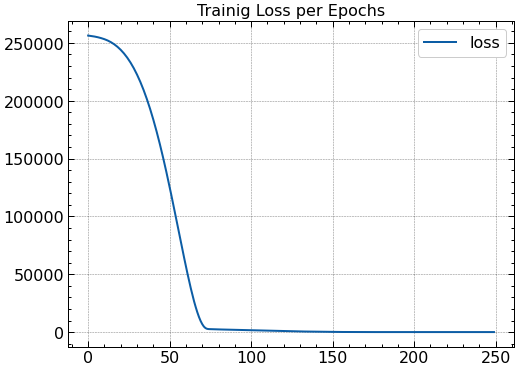

In [24]:
losses.plot();
plt.title('Trainig Loss per Epochs')
plt.show()

---------
## Compire evaluation final (MSE) on train set and test set

diharapkan angkanya mendekati satu sama lain

In [25]:
model.metrics_names

['loss']

In [26]:
training_score = model.evaluate(X_train, y_train, verbose=0) # training set
test_score = model.evaluate(X_test, y_test, verbose=0) # test set

In [27]:
training_score

24.659311294555664

In [28]:
test_score

25.2242374420166

## Evaluasi lanjutan

In [29]:
test_prediction = model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [30]:
test_prediction

array([[404.6956 ],
       [622.8378 ],
       [591.44226],
       [571.5572 ],
       [366.05573],
       [578.5016 ],
       [514.4182 ],
       [458.48154],
       [548.5872 ],
       [446.89825],
       [611.0895 ],
       [548.2667 ],
       [418.50012],
       [408.27725],
       [650.5117 ],
       [436.6855 ],
       [507.7957 ],
       [659.22424],
       [661.8679 ],
       [564.8588 ],
       [333.67596],
       [444.22128],
       [381.94907],
       [378.17346],
       [565.9227 ],
       [609.90454],
       [531.7363 ],
       [427.25388],
       [654.7355 ],
       [413.4777 ],
       [442.01843],
       [484.4947 ],
       [437.80313],
       [681.12463],
       [424.1451 ],
       [417.0922 ],
       [501.27078],
       [549.80884],
       [509.09912],
       [394.78168],
       [617.88916],
       [416.0248 ],
       [603.7548 ],
       [445.3361 ],
       [501.34793],
       [581.0197 ],
       [668.266  ],
       [489.7616 ],
       [318.02142],
       [484.7954 ],


In [31]:
test_prediction = pd.Series(test_prediction.reshape(300,))

In [32]:
test_prediction

0      404.695587
1      622.837830
2      591.442261
3      571.557190
4      366.055725
          ...    
295    528.396118
296    514.706299
297    608.955139
298    416.348480
299    410.284363
Length: 300, dtype: float32

In [33]:
pred_df = pd.DataFrame(y_test, columns=['Test Y'])

In [34]:
pred_df 

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [35]:
pred_df = pd.concat([pred_df,test_prediction], axis =1)

In [36]:
pred_df

,Test Y,0
0,402.296319,404.695587
1,624.156198,622.837830
2,582.455066,591.442261
3,578.588606,571.557190
4,371.224104,366.055725
...,...,...
295,525.704657,528.396118
296,502.909473,514.706299
297,612.727910,608.955139
298,417.569725,416.348480


In [37]:
pred_df.columns = ['Test Y','Model Prediction']

In [38]:
pred_df

,Test Y,Model Prediction
0,402.296319,404.695587
1,624.156198,622.837830
2,582.455066,591.442261
3,578.588606,571.557190
4,371.224104,366.055725
...,...,...
295,525.704657,528.396118
296,502.909473,514.706299
297,612.727910,608.955139
298,417.569725,416.348480


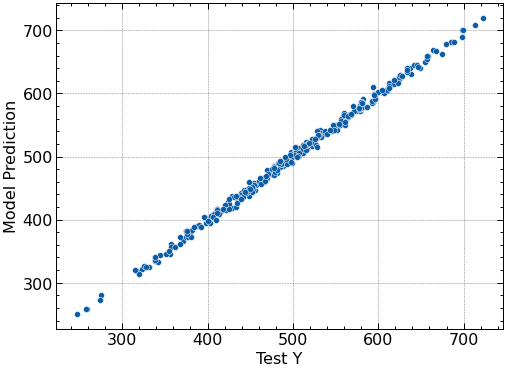

In [39]:
sns.scatterplot(x='Test Y', y='Model Prediction', data=pred_df);

In [40]:
pred_df['Errors'] =  pred_df['Test Y'] - pred_df['Model Prediction']

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


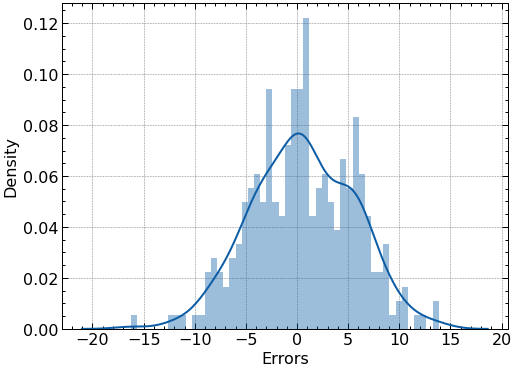

In [41]:
sns.distplot(pred_df['Errors'], bins=50);

## Metrics MAE, MSE , RMSE

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
MAE = mean_absolute_error(pred_df['Test Y'] , pred_df['Model Prediction'])
MAE

4.019943150383919

In [44]:
MSE = mean_squared_error(pred_df['Test Y'] , pred_df['Model Prediction'])
MSE

25.22424191364895

In [45]:
RMSE = np.sqrt(MSE)
RMSE

5.022374131190243

## Mengetahui nilai MAE baik atau buruk

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


In [47]:
(100 * 4.001) / 498.6

0.8024468511833133

-------
## Prediksi batu permata baru 

In [48]:
new_gem = [[995, 1000]]

In [49]:
new_gem = scaler.transform(new_gem)

In [50]:
new_gem

array([[-0.35354377,  0.53968792]])

In [51]:
model.predict(new_gem)

1/1 [==============================] - 0s 62ms/step


array([[298.64334]], dtype=float32)

----------
## saving Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('Gemstone.h5')

In [54]:
later_mode = load_model('Gemstone.h5')

In [55]:
later_mode.predict(new_gem)

1/1 [==============================] - 0s 216ms/step


array([[298.64334]], dtype=float32)

## Greate job!